In [13]:
#from google.colab import files
#uploaded = files.upload()

In [14]:
import pandas as pd

# Load both datasets
internal_df = pd.read_csv("internal_ledger_large.csv")
custodian_df = pd.read_csv("custodian_statement_large.csv")

# Display the first few rows of each
print("Internal Ledger Data:")
display(internal_df.head())

print("Custodian Statement Data:")
display(custodian_df.head())

# Basic structure check

print("\nInternal Ledger Info:")
print(internal_df.info())

print("\nCustodian Statement Info:")
print(custodian_df.info())

Internal Ledger Data:


,Date,Account,Security,Quantity,Value,TradeID
0,2025-10-15,A003,NVDA,272,78768.44,T0001
1,2025-10-04,A009,JPM,392,53657.10,T0002
2,2025-10-08,A008,META,90,24216.15,T0003
3,2025-10-05,A005,BABA,84,11371.40,T0004
4,2025-10-16,A002,META,83,38215.38,T0005


Custodian Statement Data:


,Date,Account,Security,Quantity,Value,TradeID
0,2025-10-24,A004,JPM,445,53599.160000,T0092
1,2025-10-13,A002,BABA,89,26500.623389,T0044
2,2025-10-14,A003,MSFT,324,104846.250000,T0051
3,2025-10-05,A001,AAPL,368,122032.520000,T0091
4,2025-10-23,A003,NVDA,288,105904.830000,T0018



Internal Ledger Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      100 non-null    object 
 1   Account   100 non-null    object 
 2   Security  100 non-null    object 
 3   Quantity  100 non-null    int64  
 4   Value     100 non-null    float64
 5   TradeID   100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB
None

Custodian Statement Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      100 non-null    object 
 1   Account   100 non-null    object 
 2   Security  100 non-null    object 
 3   Quantity  100 non-null    int64  
 4   Value     100 non-null    float64
 5   TradeID   100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage:

In [15]:
# Step 2.1 — Basic Structure and Summary Stats

print("Internal Ledger Summary:")
display(internal_df.describe(include='all'))

print("\nCustodian Statement Summary:")
display(custodian_df.describe(include='all'))

# Step 2.2 — Check for missing values
print("\nMissing Values in Internal Ledger:")
print(internal_df.isnull().sum())

print("\nMissing Values in Custodian Statement:")
print(custodian_df.isnull().sum())

# Step 2.3 — Verify data types

print("\nData Types:")
print(internal_df.dtypes)

Internal Ledger Summary:


,Date,Account,Security,Quantity,Value,TradeID
count,100,100,100,100.000000,100.000000,100
unique,28,10,10,NaN,NaN,100
top,2025-10-05,A004,META,NaN,NaN,T0001
freq,8,13,16,NaN,NaN,1
mean,NaN,NaN,NaN,264.530000,74796.869400,NaN
std,NaN,NaN,NaN,134.680951,46995.125884,NaN
min,NaN,NaN,NaN,53.000000,8903.520000,NaN
25%,NaN,NaN,NaN,140.000000,35919.350000,NaN
50%,NaN,NaN,NaN,272.500000,67411.655000,NaN
75%,NaN,NaN,NaN,370.250000,105371.910000,NaN



Custodian Statement Summary:


,Date,Account,Security,Quantity,Value,TradeID
count,100,100,100,100.000000,100.000000,100
unique,28,10,10,NaN,NaN,100
top,2025-10-05,A004,META,NaN,NaN,T0092
freq,8,13,16,NaN,NaN,1
mean,NaN,NaN,NaN,264.570000,74800.839839,NaN
std,NaN,NaN,NaN,134.618823,46996.515572,NaN
min,NaN,NaN,NaN,53.000000,8903.520000,NaN
25%,NaN,NaN,NaN,140.000000,35919.350000,NaN
50%,NaN,NaN,NaN,272.500000,67411.655000,NaN
75%,NaN,NaN,NaN,370.250000,105371.910000,NaN



Missing Values in Internal Ledger:
Date        0
Account     0
Security    0
Quantity    0
Value       0
TradeID     0
dtype: int64

Missing Values in Custodian Statement:
Date        0
Account     0
Security    0
Quantity    0
Value       0
TradeID     0
dtype: int64

Data Types:
Date         object
Account      object
Security     object
Quantity      int64
Value       float64
TradeID      object
dtype: object


In [16]:
internal_df['Date']= pd.to_datetime(internal_df['Date'])
custodian_df['Date'] = pd.to_datetime(custodian_df['Date'])
print("✅ Date columns converted successfully!")
print(internal_df['Date'].head())

✅ Date columns converted successfully!
0   2025-10-15
1   2025-10-04
2   2025-10-08
3   2025-10-05
4   2025-10-16
Name: Date, dtype: datetime64[ns]


In [17]:
internal_df['UniqueKey'] = (
    internal_df['Account'] + "-" +
    internal_df['Security'] + "-" +
    internal_df['Date'].dt.strftime("%Y%m%d")
)

custodian_df['UniqueKey'] = (
    custodian_df['Account'] + "-" +
    custodian_df['Security'] + "-" +
    custodian_df['Date'].dt.strftime("%Y%m%d")
)

print("✅ UniqueKey column created successfully!")
display(internal_df.head(3))
display(custodian_df.head(3))

✅ UniqueKey column created successfully!


,Date,Account,Security,Quantity,Value,TradeID,UniqueKey
0,2025-10-15,A003,NVDA,272,78768.44,T0001,A003-NVDA-20251015
1,2025-10-04,A009,JPM,392,53657.10,T0002,A009-JPM-20251004
2,2025-10-08,A008,META,90,24216.15,T0003,A008-META-20251008


,Date,Account,Security,Quantity,Value,TradeID,UniqueKey
0,2025-10-24,A004,JPM,445,53599.160000,T0092,A004-JPM-20251024
1,2025-10-13,A002,BABA,89,26500.623389,T0044,A002-BABA-20251013
2,2025-10-14,A003,MSFT,324,104846.250000,T0051,A003-MSFT-20251014


In [18]:

# Remove duplicates
internal_df.drop_duplicates(subset=["TradeID", "Date"], keep="last", inplace=True)
custodian_df.drop_duplicates(subset=["TradeID", "Date"], keep="last", inplace=True)
print("✅ Duplicates removed.")

# Handle missing values
numeric_cols_internal = internal_df.select_dtypes(include=['float64','int64']).columns
numeric_cols_custodian = custodian_df.select_dtypes(include=['float64','int64']).columns

internal_df[numeric_cols_internal] = internal_df[numeric_cols_internal].fillna(0)
custodian_df[numeric_cols_custodian] = custodian_df[numeric_cols_custodian].fillna(0)

internal_df.fillna("Unknown", inplace=True)
custodian_df.fillna("Unknown", inplace=True)

print("\n✅ Missing values handled successfully.")




✅ Duplicates removed.

✅ Missing values handled successfully.


In [19]:
# Merge both datasets on UniqueKey

recon_df = pd.merge(
    internal_df,
    custodian_df,
    on = "UniqueKey",
    how = "outer",
    suffixes = ("_Internal", "_Custodian")
)

# Display the merged dataset
print("✅ Data merged successfully! Shape:", recon_df.shape)
display(recon_df.head(5))

✅ Data merged successfully! Shape: (102, 13)


,Date_Internal,Account_Internal,Security_Internal,Quantity_Internal,Value_Internal,TradeID_Internal,UniqueKey,Date_Custodian,Account_Custodian,Security_Custodian,Quantity_Custodian,Value_Custodian,TradeID_Custodian
0,2025-10-05,A001,AAPL,368,122032.52,T0091,A001-AAPL-20251005,2025-10-05,A001,AAPL,368,122032.52,T0091
1,2025-10-02,A001,AMZN,133,65191.79,T0052,A001-AMZN-20251002,2025-10-02,A001,AMZN,133,65191.79,T0052
2,2025-10-15,A001,AMZN,350,162259.97,T0054,A001-AMZN-20251015,2025-10-15,A001,AMZN,350,162259.97,T0054
3,2025-10-29,A001,AMZN,123,21993.31,T0077,A001-AMZN-20251029,2025-10-29,A001,AMZN,123,21993.31,T0077
4,2025-10-05,A001,BABA,170,34416.47,T0019,A001-BABA-20251005,2025-10-05,A001,BABA,170,34416.47,T0019


In [20]:
# Calculate differences

recon_df['Quantity_Diff'] = recon_df['Quantity_Internal'] - recon_df['Quantity_Custodian']
recon_df['Value_Diff'] = recon_df['Value_Internal'] - recon_df['Value_Custodian']

# Display a few rows
display(recon_df[['UniqueKey', 'Quantity_Internal', 'Quantity_Custodian', 'Quantity_Diff', 'Value_Internal', 'Value_Custodian', 'Value_Diff']].head(10))

,UniqueKey,Quantity_Internal,Quantity_Custodian,Quantity_Diff,Value_Internal,Value_Custodian,Value_Diff
0,A001-AAPL-20251005,368,368,0,122032.52,122032.52,0.0
1,A001-AMZN-20251002,133,133,0,65191.79,65191.79,0.0
2,A001-AMZN-20251015,350,350,0,162259.97,162259.97,0.0
3,A001-AMZN-20251029,123,123,0,21993.31,21993.31,0.0
4,A001-BABA-20251005,170,170,0,34416.47,34416.47,0.0
5,A001-BABA-20251017,172,174,-2,69675.67,69675.67,0.0
6,A001-BABA-20251022,140,140,0,62657.78,62657.78,0.0
7,A001-JPM-20251001,423,423,0,119959.15,119959.15,0.0
8,A001-META-20251001,187,187,0,36420.31,36420.31,0.0
9,A001-META-20251002,388,388,0,96446.41,96446.41,0.0


In [21]:
# Define match status based on differences
recon_df['Match_Status'] = recon_df.apply(
    lambda x: "MATCH" if (x['Quantity_Diff'] == 0 and round(x['Value_Diff'], 2) == 0)
    else "MISMATCH",
    axis=1
)

# Quick summary
print(recon_df['Match_Status'].value_counts())
display(recon_df.head(10))

match_rate = recon_df['Match_Status'].value_counts(normalize=True).get('MATCH', 0) * 100
print(f"✅ Match rate: {match_rate:.2f}% of transactions are fully reconciled.")



Match_Status
MATCH       90
MISMATCH    12
Name: count, dtype: int64


,Date_Internal,Account_Internal,Security_Internal,Quantity_Internal,Value_Internal,TradeID_Internal,UniqueKey,Date_Custodian,Account_Custodian,Security_Custodian,Quantity_Custodian,Value_Custodian,TradeID_Custodian,Quantity_Diff,Value_Diff,Match_Status
0,2025-10-05,A001,AAPL,368,122032.52,T0091,A001-AAPL-20251005,2025-10-05,A001,AAPL,368,122032.52,T0091,0,0.0,MATCH
1,2025-10-02,A001,AMZN,133,65191.79,T0052,A001-AMZN-20251002,2025-10-02,A001,AMZN,133,65191.79,T0052,0,0.0,MATCH
2,2025-10-15,A001,AMZN,350,162259.97,T0054,A001-AMZN-20251015,2025-10-15,A001,AMZN,350,162259.97,T0054,0,0.0,MATCH
3,2025-10-29,A001,AMZN,123,21993.31,T0077,A001-AMZN-20251029,2025-10-29,A001,AMZN,123,21993.31,T0077,0,0.0,MATCH
4,2025-10-05,A001,BABA,170,34416.47,T0019,A001-BABA-20251005,2025-10-05,A001,BABA,170,34416.47,T0019,0,0.0,MATCH
5,2025-10-17,A001,BABA,172,69675.67,T0063,A001-BABA-20251017,2025-10-17,A001,BABA,174,69675.67,T0063,-2,0.0,MISMATCH
6,2025-10-22,A001,BABA,140,62657.78,T0099,A001-BABA-20251022,2025-10-22,A001,BABA,140,62657.78,T0099,0,0.0,MATCH
7,2025-10-01,A001,JPM,423,119959.15,T0020,A001-JPM-20251001,2025-10-01,A001,JPM,423,119959.15,T0020,0,0.0,MATCH
8,2025-10-01,A001,META,187,36420.31,T0055,A001-META-20251001,2025-10-01,A001,META,187,36420.31,T0055,0,0.0,MATCH
9,2025-10-02,A001,META,388,96446.41,T0056,A001-META-20251002,2025-10-02,A001,META,388,96446.41,T0056,0,0.0,MATCH


✅ Match rate: 88.24% of transactions are fully reconciled.


In [22]:
# Step 4.1 — High-level reconciliation summary
summary = recon_df['Match_Status'].value_counts().to_frame().reset_index()
summary.columns = ['Status', 'Count']
summary['Percentage'] = (summary['Count'] / summary['Count'].sum() * 100).round(2)

print("✅ Reconciliation Summary:")
display(summary)

# Match rate
match_rate = summary.loc[summary['Status'] == 'MATCH', 'Percentage'].values[0]
print(f"\nOverall Match Rate: {match_rate:.2f}%")


✅ Reconciliation Summary:


,Status,Count,Percentage
0,MATCH,90,88.24
1,MISMATCH,12,11.76



Overall Match Rate: 88.24%


In [23]:
# Step 4.2 — Mismatches by Account
mismatch_accounts = (
    recon_df[recon_df['Match_Status'] == 'MISMATCH']
    .groupby('Account_Internal', dropna=False)
    .size()
    .reset_index(name='Mismatch_Count')
    .sort_values(by='Mismatch_Count', ascending=False)
)

print("⚠️ Accounts with Most Mismatches:")
display(mismatch_accounts.head(10))


⚠️ Accounts with Most Mismatches:


,Account_Internal,Mismatch_Count
1,A002,2
2,A003,2
3,A005,2
5,A009,2
4,A008,2
0,A001,1
6,A010,1


In [24]:
# Step 4.3 — Mismatches by Security
mismatch_securities = (
    recon_df[recon_df['Match_Status'] == 'MISMATCH']
    .groupby('Security_Internal', dropna=False)
    .size()
    .reset_index(name='Mismatch_Count')
    .sort_values(by='Mismatch_Count', ascending=False)
)

print("⚠️ Securities with Most Mismatches:")
display(mismatch_securities.head(10))


⚠️ Securities with Most Mismatches:


,Security_Internal,Mismatch_Count
1,BABA,3
5,NVDA,3
0,AAPL,2
2,GOOGL,2
3,META,1
4,NFLX,1


In [25]:
# Step 4.4 — Top 10 Largest Value Differences
top_value_diff = (
    recon_df.reindex(recon_df['Value_Diff'].abs().sort_values(ascending=False).index)
    [['UniqueKey', 'Value_Internal', 'Value_Custodian', 'Value_Diff', 'Match_Status']]
    .head(10)
)

print("💰 Top 10 Largest Value Differences:")
display(top_value_diff)


💰 Top 10 Largest Value Differences:


,UniqueKey,Value_Internal,Value_Custodian,Value_Diff,Match_Status
47,A005-GOOGL-20251005,54674.79,109856.760000,-55181.970000,MISMATCH
48,A005-GOOGL-20251005,109856.76,54674.790000,55181.970000,MISMATCH
81,A009-AAPL-20251028,110989.27,111407.705669,-418.435669,MISMATCH
25,A003-NVDA-20251018,54431.19,54045.449399,385.740601,MISMATCH
101,A010-NVDA-20251017,30797.02,30960.273734,-163.253734,MISMATCH
26,A003-NVDA-20251021,28471.04,28595.020657,-123.980657,MISMATCH
12,A002-BABA-20251013,26436.54,26500.623389,-64.083389,MISMATCH
82,A009-BABA-20251008,21617.73,21630.761098,-13.031098,MISMATCH
3,A001-AMZN-20251029,21993.31,21993.310000,0.000000,MATCH
4,A001-BABA-20251005,34416.47,34416.470000,0.000000,MATCH


In [26]:
# Step 4.5 — Export final reconciliation output
recon_df.to_csv("reconciliation_report.csv", index=False)
print("✅ reconciliation_report.csv exported successfully!")


✅ reconciliation_report.csv exported successfully!


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean visual theme
sns.set(style = "whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

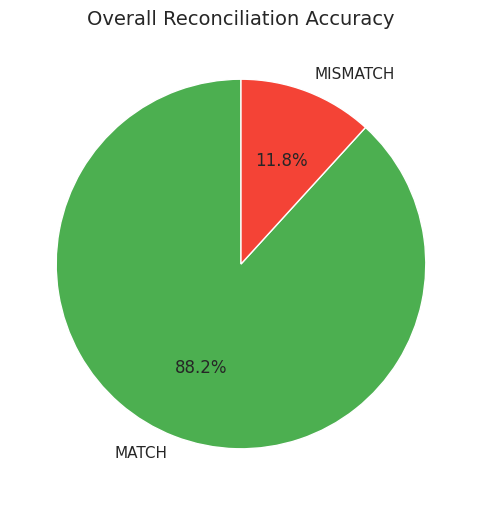

In [28]:
# Step 5.1 — Pie chart of reconciliation results
match_summary = recon_df['Match_Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    match_summary.values,
    labels=match_summary.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#4CAF50', '#F44336']
)
plt.title('Overall Reconciliation Accuracy', fontsize=14)
plt.show()


/tmp/ipython-input-618227451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


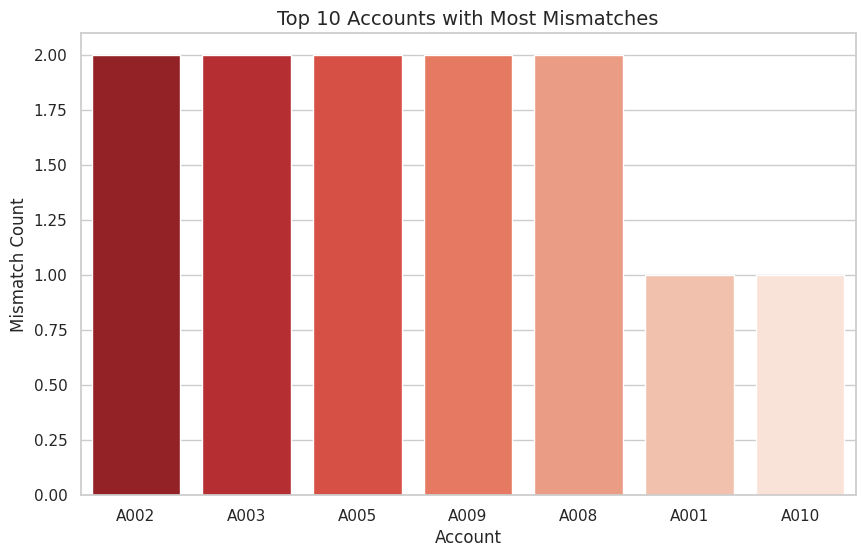

In [29]:
# Step 5.2 — Bar chart for mismatches by account
sns.barplot(
    data=mismatch_accounts.head(10),
    x='Account_Internal',
    y='Mismatch_Count',
    palette='Reds_r'
)
plt.title('Top 10 Accounts with Most Mismatches', fontsize=14)
plt.xlabel('Account')
plt.ylabel('Mismatch Count')
plt.show()


/tmp/ipython-input-1081220985.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


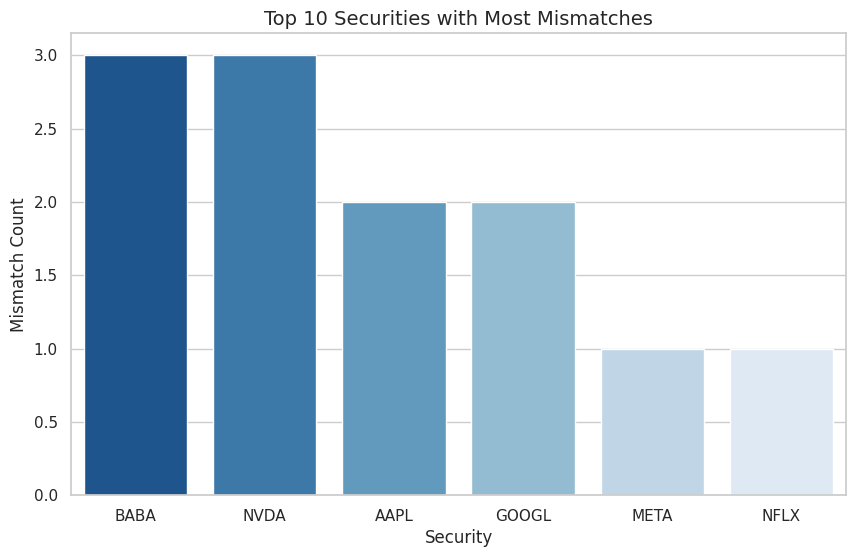

In [30]:
# Step 5.3 — Bar chart for mismatches by security
sns.barplot(
    data=mismatch_securities.head(10),
    x='Security_Internal',
    y='Mismatch_Count',
    palette='Blues_r'
)
plt.title('Top 10 Securities with Most Mismatches', fontsize=14)
plt.xlabel('Security')
plt.ylabel('Mismatch Count')
plt.show()


/tmp/ipython-input-3891441746.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


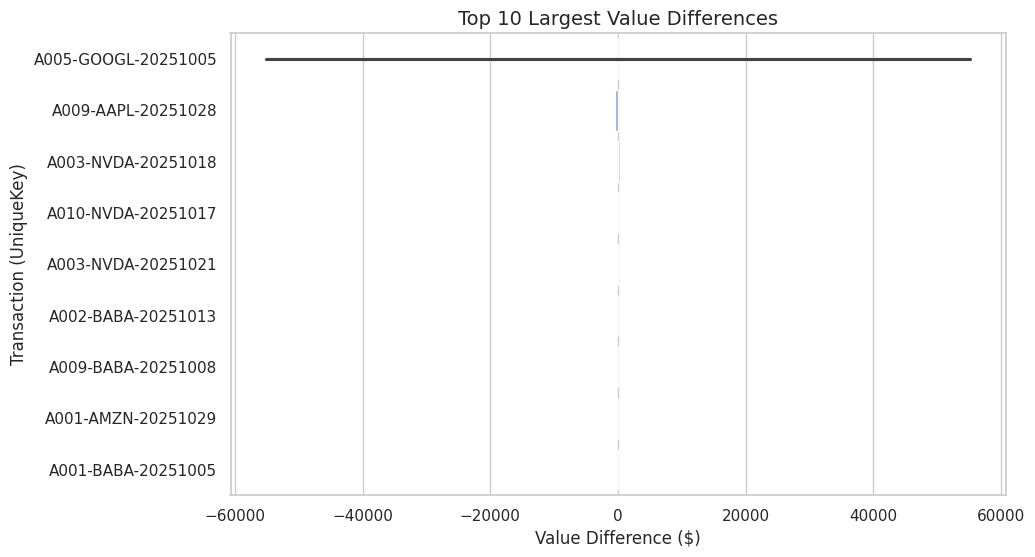

In [31]:
# Step 5.4 — Largest Value Differences
sns.barplot(
    data=top_value_diff,
    x='Value_Diff',
    y='UniqueKey',
    palette='coolwarm'
)
plt.title('Top 10 Largest Value Differences', fontsize=14)
plt.xlabel('Value Difference ($)')
plt.ylabel('Transaction (UniqueKey)')
plt.show()


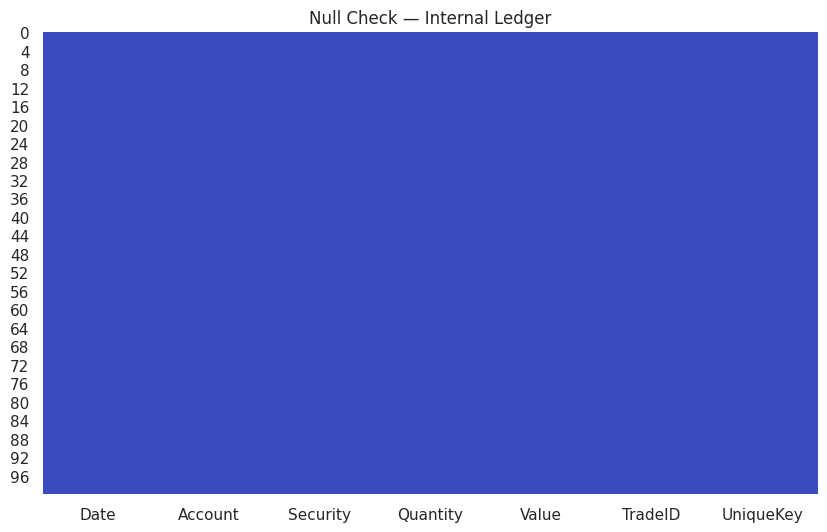

In [32]:
plt.savefig("mismatch_by_account.png", dpi=300, bbox_inches='tight')

sns.heatmap(internal_df.isnull(), cbar=False, cmap='coolwarm')
plt.title("Null Check — Internal Ledger")
plt.show()


In [33]:
def run_reconciliation(internal_file, custodian_file):
    import pandas as pd

    # Load data
    internal = pd.read_csv(internal_file)
    custodian = pd.read_csv(custodian_file)

    # Prepare data
    internal['Date'] = pd.to_datetime(internal['Date'])
    custodian['Date'] = pd.to_datetime(custodian['Date'])

    internal['UniqueKey'] = internal['Account'] + "-" + internal['Security'] + "-" + internal['Date'].dt.strftime("%Y%m%d")
    custodian['UniqueKey'] = custodian['Account'] + "-" + custodian['Security'] + "-" + custodian['Date'].dt.strftime("%Y%m%d")

    # Merge
    df = pd.merge(internal, custodian, on='UniqueKey', how='outer', suffixes=('_Internal', '_Custodian'))

    # Calculate differences
    df['Quantity_Diff'] = df['Quantity_Internal'] - df['Quantity_Custodian']
    df['Value_Diff'] = df['Value_Internal'] - df['Value_Custodian']

    # Match flag
    df['Match_Status'] = df.apply(
        lambda x: 'MATCH' if (x['Quantity_Diff'] == 0 and round(x['Value_Diff'], 2) == 0) else 'MISMATCH',
        axis=1
    )

    # Export final report
    output_file = "Daily_Reconciliation_Report.csv"
    df.to_csv(output_file, index=False)
    print(f"✅ Reconciliation completed and saved as {output_file}")

    # Print summary
    summary = df['Match_Status'].value_counts()
    print("\nSummary:")
    print(summary)

    return df

# Run it once to verify
final_df = run_reconciliation("internal_ledger_large.csv", "custodian_statement_large.csv")


✅ Reconciliation completed and saved as Daily_Reconciliation_Report.csv

Summary:
Match_Status
MATCH       90
MISMATCH    12
Name: count, dtype: int64


In [34]:
mismatch_df = final_df[final_df['Match_Status'] == 'MISMATCH']
mismatch_df.to_csv("Exception_Report.csv", index=False)

print("📧 Exception_Report.csv ready for email or audit review.")
print(f"{len(mismatch_df)} mismatches found and exported.")


📧 Exception_Report.csv ready for email or audit review.
12 mismatches found and exported.


In [35]:
match_rate = (final_df['Match_Status'].value_counts(normalize=True).get('MATCH', 0) * 100)

print("📈 Executive Summary:")
print(f"- Total Transactions: {len(final_df)}")
print(f"- Matches: {(match_rate):.2f}%")
print(f"- Mismatches: {100 - match_rate:.2f}%")
print(f"- Reconciliation Accuracy: {match_rate:.2f}%")
print("\nThis automated script can be scheduled daily to compare internal ledgers and custodian data, detect mismatches, and export reports automatically.")


📈 Executive Summary:
- Total Transactions: 102
- Matches: 88.24%
- Mismatches: 11.76%
- Reconciliation Accuracy: 88.24%

This automated script can be scheduled daily to compare internal ledgers and custodian data, detect mismatches, and export reports automatically.
